# Project: Data Wrangling - WeRateDogs

## Table of Content

1. [Introduction](#INTRO)
2. [Data Gathering](#DG)
3. [Assessing Data](#AD)  
    2.1 [Quality issues](#QI)  
    2.2 [Tidiness issues](#TI)
4. [Data cleaning](#DC)
5. [Storing Data](#SD)
6. [Analysis and Visualization](#AV)

<a id='INTRO'></a>
## Introduction

Since data rarely comes clean

This project is aimed at demonstrating my data wrangling/data cleaning skills, using python and it's libraries i will be gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The dataset i will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Haha, Because they love dogs.

<a id='DG'></a>
## Data Gathering

The first step of the wrangling process is data gathering.

In this step I will be looking to gather all three pieces of data that will be needed for this project
- The first; manually reading in the `twitter-archive-enhanced.csv` data downloaded on my workstation
- Programmatically downloading the `image-predictions.tsv` data from the [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- And the third being to query Twitter API using the tweet ID in the `twitter-archive-enhanced.csv` data to gather each tweet's JSON data using Python's tweepy library and store each tweets entire set of JSON data in a file called `tweet_json.txt` file.

**First we will go ahead to import all the packages we will be needing for this project**

In [1]:
#import packages
import pandas as pd
import requests
import numpy as np
import tweepy
import os
import json
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

As pointed out earlier we manually read in the first dataset already downloaded into a dataframe

In [2]:
#read in twitter archive enhanced data our first dataset
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

Using the Requests library we will programmatically download the `image-predictions.tsv` data online, and save it's content into a tsv file, that will be read into a dataframe later on

In [3]:
#download image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#Save data into file using response.content
with open(os.path.join(url.split('/')[-1]), mode= 'wb') as file:
    file.write(response.content)


Finally using the Tweepy library, I would query additional data via the Twitter API to gather each tweets JSON data and store the contents in the file `tweet_json.txt`

In [5]:
'''
#Set consumer key, secret, and access_token and secret
#They will be hidden to comply with Twitter API rules
consumer_key = 'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

#Set Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit= True)
'''

"\n#Set consumer key, secret, and access_token and secret\n#They will be hidden to comply with Twitter API rules\nconsumer_key = 'XXXXXXXXXXXXXXXXXXXXX'\nconsumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'\naccess_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'\naccess_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'\n\n#Set Authentication\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit= True)\n"

In [6]:
'''
#Query Twitter's API for JSON data for each tweet id in the dataframe

id_of_tweet = df.tweet_id
count = 0
failed = {}
#Save output in a newline in a txt file
with open('tweet_json.txt', mode= 'w') as outputfile:
    for idx in id_of_tweet:
        count += 1
        try:
            tweet = api.get_status(idx, tweet_mode= 'extended')
            json.dump(tweet._json, outputfile)
            outputfile.write('\n')
        
        except tweepy.errors.TweepyException as e:
            print('No Data found')
            failed[idx] = e
            pass
print(failed)
'''

"\n#Query Twitter's API for JSON data for each tweet id in the dataframe\n\nid_of_tweet = df.tweet_id\ncount = 0\nfailed = {}\n#Save output in a newline in a txt file\nwith open('tweet_json.txt', mode= 'w') as outputfile:\n    for idx in id_of_tweet:\n        count += 1\n        try:\n            tweet = api.get_status(idx, tweet_mode= 'extended')\n            json.dump(tweet._json, outputfile)\n            outputfile.write('\n')\n        \n        except tweepy.errors.TweepyException as e:\n            print('No Data found')\n            failed[idx] = e\n            pass\nprint(failed)\n"

Now read the `tweet_json.txt` file by line into a pandas dataframe with variables of interest

In [7]:
#extract relevant variables of interest into a list
json_list = []
with open('tweet_json.txt', mode= 'r') as json_file:
    for text in json_file:
        texts = json.loads(text)
        tweet_id = texts['id']
        retweet_count = texts['retweet_count']
        favorite_count = texts['favorite_count']
        tweet_date = texts['created_at']
        tweet_source = texts['source']
        json_list.append({'tweet_id' : tweet_id,
                       'retweet_count' : retweet_count,
                       'favorite_count' : favorite_count})

#convert list into a dataframe
df_json = pd.DataFrame(json_list, columns = ['tweet_id', 'retweet_count','favorite_count'])

<a id='AD'></a>
## Assessing Data
Assessing our data is the second and penultimate phase of the data wrangling process.
In this section, we will detect and document quality and tidiness issues in our dataset. Detecting quality and tidiness issues can be done either **visually** or **programmatically.**

For the purpose of this project we will be documenting at least **eight (8) quality issues and two (2) tidiness issue.** 

Since we already have the `twitter-archive-enhanced` and the `twitter_json.txt` file read into this notebook in the gathering phase, we recall we only programmatically downloaded the `image-predictions.tsv` data, now we will read it in

In [8]:
#read in image predictions dataset
df_image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [9]:
#Visually inspect archived dataset
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


We can see here that this data contains 2356 rows and 17 columns.

Visually inspecting this data we also find that multiple observations in the name column contain values **'a' or 'None'** and these are not dog names. This issue will be looked at and addressed later.

In [10]:
#visually inspect API data
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6981,33737
1,892177421306343426,5284,29265
2,891815181378084864,3468,22000
3,891689557279858688,7203,36844
4,891327558926688256,7727,35231
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


This data contains 2327 rows with three columns containing our tweet_id, retweet_count and favorite_count scraped twitter API

In [11]:
#visually inspect image prediction dataset
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


The `image_prediction` data contains 2075 rows and 12 different columns, the main highlight of this data being p1 and p1_conf which stands for **prediction 1** and **prediction 1 confidence** respectively, which are used to predict which breed a dog belongs to.


Visual inspection will continue by sampling random observations to check for quality and tidiness issues.

In [12]:
#sample archive data
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413...,10,10,None,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
63,879862464715927552,NaN,NaN,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,None,None,None,None


In [13]:
#sample image prediction data
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
386,673350198937153538,https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg,1,West_Highland_white_terrier,0.119188,True,quill,0.104014,False,Maltese_dog,0.093944,True
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,0.033776,True
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True


In [14]:
#sample API data
df_json.sample(5)

,tweet_id,retweet_count,favorite_count
1595,684902183876321280,464,1718
1638,682697186228989953,333,1215
268,839239871831150596,5929,25217
428,819015337530290176,34473,0
527,805823200554876929,7451,0


After visual inspection we will move to programmatically inspect each dataframe, to get a feel of what the structure and data types in our data looks like and whether they are in the right format.

In [15]:
#Check archive data for quality and structural issues
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
##Check image prediction data for quality and structural issues
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#Check API data for quality and structural issues
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
#check for duplicates in the archive data
df_archive.duplicated().sum()

0

In [19]:
#check for duplicates in the image prediction data
df_image.duplicated().sum()

0

In [20]:
#check for duplicates in the API data
df_json.duplicated().sum()

0

In [21]:
#check for unique values prediction one
df_image.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [22]:
#check for unique values prediction two
df_image.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [23]:
#check for unique values prediction three
df_image.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

From observation, some of the values in the prediction columns start with uppercase while others start with lowercase.

In [24]:
#value counts for the dog names
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
this         1
Banjo        1
Jangle       1
Dot          1
Jaycob       1
Name: name, Length: 957, dtype: int64

From what we have above a total of 800 observations are missing a name, there could be more seeing there are so many errors in the name column, it might be of interest to really zoom in on the column, to ensure all quality issues are detected.

In [25]:
#check for unique dog names
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Inspecting what we have above we find names like **"the", "this", "very", "my","an"** as names which should not be. 

In [26]:
#check for unqiue tweet sources
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [27]:
#check number of unique tweet id's
df_archive.tweet_id.nunique()

2356

<a id='QI'></a>
### Quality issues

Listed below are some of the quality issues found in the data frames

- **df_archive**

1. The name column contains values like "a","very", "the" e.t.c which start with lowercase and are suspected not to be dog names, also we found 745 null values represented as "None".

2. Null objects in columns(in_reply_to_status_id, in_reply_to_user_id) e.t.c represented as "None"

3. The data type for the timestamp column is object when it should be a datetime.

4. The tweet source should be extracted from the source column to reflect (Twitter for iphone, Twitter Web Client e.t.c)

5. The columns in_reply_to_status_id and in_reply_to_user_id are missing 2278 values each **which might not need cleaning** as some tweets were tweeted directly with images from [WeRateDogs](https://twitter.com/dog_rates) account and they were not in reply to any tweet. Moreover we are only interested in original tweets so we will be dropping the observations in this column.

6. Likewise the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are missing 2175 values each **which might also not need cleaning** will be treated as mentioned above, hence they will be dropped.

- **df_image**

7. This dataframe is missing 281 observations present in the `df_archive` dataframe.
8. Rename p1, p1_conf and the other column headers to be more reflective column headers.
9. Values in the p1, p2 and p3 columns sometimes start with uppercase and sometimes lowercase

- **df_json**

10. This dataframe is missing 29 observations which are present in the `df_archive` dataframe. 

<a id='TI'></a>
### Tidiness issues

- **df_archive**
1. The dogstages(doggo,floofer,pupper,puppo) should be melted into one column

- **df_image and df_json**
2. This dataframes should be merged with the `df_archive` dataframe to ensure each observational unit forms a separate table and there is no duplication of information in various tables.

<a id='DC'></a>
## Cleaning Data

In this section, all of the issues documented while assessing will be addressed and cleaned. 

In [28]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### Names with "a" and "None", "very" and all other lowercase characters

I suspect the dognames were extracted using regular expressions matching words after "This is" or "Here is", "Meet" e.t.c Hence we will re-write the regular expressions to better match all names present and save result in a new column.

In [29]:
#create an empty list to store matched variables
names = []
#loop through series to match patterns
for line in df_archive_clean['text']:
    # Check if line startswith a text and succeeding character is uppercase
    if line.startswith('This is ') and re.match(r'[A-Z].*', line.split()[2]):
        names.append(line.split()[2].strip(',').strip('.').rstrip())
    elif line.startswith('Meet ') and re.match(r'[A-Z].*', line.split()[1]):
        names.append(line.split()[1].strip('.').strip(',').rstrip())
    elif line.startswith('Say hello to ') and re.match(r'[A-z].*', line.split()[3]):
        names.append(line.split()[3].strip('.').strip(',').rstrip())
    elif line.startswith('His name is ') and re.match(r'[A-Z].*', line.split()[3]):
        names.append(line.split()[3].strip(',').strip('.').rstrip())
    elif line.startswith('Her name is ') and re.match(r'[A-Z].*', line.split()[3]):
        names.append(line.split()[3].strip(',').strip('.').rstrip())
    elif line.startswith('Here we have ') and re.match(r'[A-Z].*', line.split()[3]):
        names.append(line.split()[3].strip(',').strip('.').rstrip())
    #checks if "named" is in text and the succeeding character is uppercase
    elif 'named' in line and re.match(r'[A-Z].*', line.split()[line.split().index('named') + 1]):
        names.append(line.split()[line.split().index('named') +1].strip(',').strip('.').rstrip())
    else:
        names.append("None")
#create and save result in a new column
df_archive_clean['names'] = names

### Test

In [30]:
#value count to confirm errors have been fixed
df_archive_clean.names.value_counts()

None       942
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Eevee        1
Harvey       1
Barry        1
Sweet        1
Jaycob       1
Name: names, Length: 955, dtype: int64

In [31]:
#check if column "names" has been created
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Tilly


To be sure all the lower case names and dirty words have been removed, I will generate the list from the **"name"** column and check for those in the newly created **"names"** column using regular expressions and a for loop, then proceed to drop the **"name"** column.

In [32]:
#extract names starting with lowercase
names_lower = df_archive_clean.name.str.contains('^[a-z]', regex= True)

In [33]:
#create list of lower case names
dirty_words = df_archive_clean[names_lower].name
dirty_words

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [34]:
#loop through the dirty words, search for words in newly created names
for word in dirty_words:
    if word in df_archive_clean['names']:
        print ("dirty data")
    else:
        print ("squeaky clean")

squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeaky clean
squeak

In [35]:
#drop the name column
df_archive_clean.drop(columns=["name"], axis= 1, inplace= True)

### Null objects represented as "None" in dataframe

Define: Change Nulls to NAN so they don't affect our analysis

### Code

In [36]:
df_archive_clean['names'].replace('None', np.NAN, inplace =True)
df_archive_clean['doggo'].replace('None', np.NAN, inplace =True)
df_archive_clean['floofer'].replace('None', np.NAN, inplace =True)
df_archive_clean['pupper'].replace('None', np.NAN, inplace =True)
df_archive_clean['puppo'].replace('None', np.NAN, inplace =True)

### Test

In [37]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,NaN,NaN,NaN,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,NaN,NaN,NaN,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,NaN,NaN,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,NaN,NaN,Franklin


### Object to Datetime

Define: Using pandas convert the timestamp in the df_archive dataframe to datetime

### Code

In [38]:
#change timestamp datatype
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

### Test

In [39]:
#check datatype and structure
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Clean tweet source

Define: Extract tweet source from html tag

### Code

In [40]:
#using regular expression extract tweet source
df_archive_clean['source'] = df_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [41]:
#check if tweet sources matched
df_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Rename columns

Define: using pandas rename p1, p1_conf and p1_dog to be more reflective column headers

### Code

In [42]:
#rename columns in image prediction data
df_image_clean.rename(columns= {"p1": "prediction_one","p1_conf":"prediction_one_confidence","p1_dog":"prediction_one_is_dog",
                               "p2":"prediction_two","p2_conf":"prediction_two_confidence","p2_dog":"prediction_two_is_dog",
                               "p3":"prediction_three","p3_conf":"prediction_three_confidence","p3_dog":"prediction_three_is_dog"}, inplace= True)

### Test

In [43]:
#confirm column headers were renamed
df_image_clean.head()

,tweet_id,jpg_url,img_num,prediction_one,prediction_one_confidence,prediction_one_is_dog,prediction_two,prediction_two_confidence,prediction_two_is_dog,prediction_three,prediction_three_confidence,prediction_three_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Melt the dogstages into one column

Define: Combine floofer, doggo, pupperand puppo into one column indicating dog stage

### Code

There are instances where there are multiple dog stages for one observation, we will put this into consideration before joining the columns. To ensure we can perform a count we will first replace all the null values with empty strings.

In [44]:
#replace null values with empty strings
df_archive_clean.doggo.replace(np.NaN, '', inplace=True)
df_archive_clean.floofer.replace(np.NaN, '', inplace=True)
df_archive_clean.pupper.replace(np.NaN, '', inplace=True)
df_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [45]:
#group observations by dog stages and get number of each arrangement
df_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


Next we create the stage column and melt doggo, floofer, puppo and pupper columns into the stage column

In [46]:
#create stage column and melt all columns into stage column
df_archive_clean['stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo
df_archive_clean.loc[df_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [47]:
#confirm values in stage column
df_archive_clean.stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [48]:
#drop columns doggo, floofer, pupper, puppo
df_archive_clean.drop(columns= ['doggo','floofer','pupper','puppo'], axis= 1, inplace= True)

In [49]:
#check structure
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Perfect!!!, the dogstages have been combined into one column, I will proceed to replacing the empty strings with null values, so they don't show up in our analysis as true values.

In [50]:
df_archive_clean.stage.replace('', np.NaN, inplace=True)

### Test

In [51]:
#check for unique values in dog stage
df_archive_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [52]:
#value counts in dog stage
df_archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

### Drop the data in columns not needed for analysis and also drop columns:

  #### Define: 
  Drop data in the following columns from `df_archive` and also drop columns: 
  
in_reply_to_status_id  
in_reply_to_user_id   
retweeted_status_id  
retweeted_status_user_id  
retweeted_status_timestamp 

### Code

In [53]:
#exclude data
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isnull()]
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_timestamp.isnull()]

In [54]:
#drop columns
df_archive_clean.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis= 1, inplace= True)

### Test

In [55]:
#confirm columns have been dropped
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   names               1411 non-null   object             
 8   stage               336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


In [56]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


### Standardize case for dog breeds

Define: Change all values in prediction_one, prediction_two and prediction_three to lowercase

In [57]:
#change values to lowercase
df_image_clean['prediction_one'] = df_image_clean.prediction_one.astype(str).str.lower()
df_image_clean['prediction_two'] = df_image_clean.prediction_two.astype(str).str.lower()
df_image_clean['prediction_three'] = df_image_clean.prediction_three.astype(str).str.lower()

### Test

In [58]:
#confirm values in prediction_one are lowercase
df_image_clean.prediction_one.value_counts()

golden_retriever       150
labrador_retriever     100
pembroke                89
chihuahua               83
pug                     57
                      ... 
tricycle                 1
pole                     1
african_hunting_dog      1
sea_urchin               1
tick                     1
Name: prediction_one, Length: 378, dtype: int64

In [59]:
#confirm values in prediction_two are lowercase
df_image_clean.prediction_two.value_counts()

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
seashore                1
desk                    1
drake                   1
coral_reef              1
sombrero                1
Name: prediction_two, Length: 404, dtype: int64

In [60]:
#confirm values in prediction_three are lowercase
df_image_clean.prediction_three.value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
plunger                1
vacuum                 1
triceratops            1
swimming_trunks        1
mosquito_net           1
Name: prediction_three, Length: 408, dtype: int64

### Join Dataframes

Define: Join dataframes on tweet_id


### Code

In [61]:
#merge archive dataframe and json dataframe
df_archive_master = df_archive_clean.merge(df_json_clean, on= 'tweet_id', how= 'inner')

In [62]:
#merge image prediction data with already merged dataframe
df_archive_master = df_archive_master.merge(df_image_clean, on= 'tweet_id', how= 'inner')

Since prediction one carries the highest confidence level, I will like to drop prediction two and three from the dataframe

In [63]:
df_archive_master.drop(columns= ['prediction_two','prediction_two_is_dog','prediction_two_confidence','prediction_three',
                                 'prediction_three_confidence','prediction_three_is_dog'], axis= 1, inplace= True)

### Test

In [64]:
#confirm data has been merged correctly
df_archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_one,prediction_one_confidence,prediction_one_is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6981,33737,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5284,29265,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3468,22000,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True


In [65]:
#check master dataframe structure
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   1963 non-null   int64              
 1   timestamp                  1963 non-null   datetime64[ns, UTC]
 2   source                     1963 non-null   object             
 3   text                       1963 non-null   object             
 4   expanded_urls              1963 non-null   object             
 5   rating_numerator           1963 non-null   int64              
 6   rating_denominator         1963 non-null   int64              
 7   names                      1362 non-null   object             
 8   stage                      302 non-null    object             
 9   retweet_count              1963 non-null   int64              
 10  favorite_count             1963 non-null   int64              
 11  jpg_

In [66]:
#confirm there are no duplicates in the merged data
df_archive_master.duplicated().sum()

0

<a id='SD'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
#save data to csv file
df_archive_master.to_csv('twitter_archive_master.csv', index= False)
df_image_clean.to_csv('image_prediction.csv', index= False)

<a id='AV'></a>
## Analyzing and Visualizing Data

### Insights:
1. Most common tweet source

2. Most popular tweets, highest retweets and highest likes

3. Popular dog breed predictions

4. Highest rating ever

5. Average retweet and average likes per dog breed

### **Most common tweet source**

In [68]:
#count number of sources
df_archive_master.source.value_counts()

Twitter for iPhone    1925
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

Text(0.5, 1.0, 'Percentage distribution of Tweet sources')

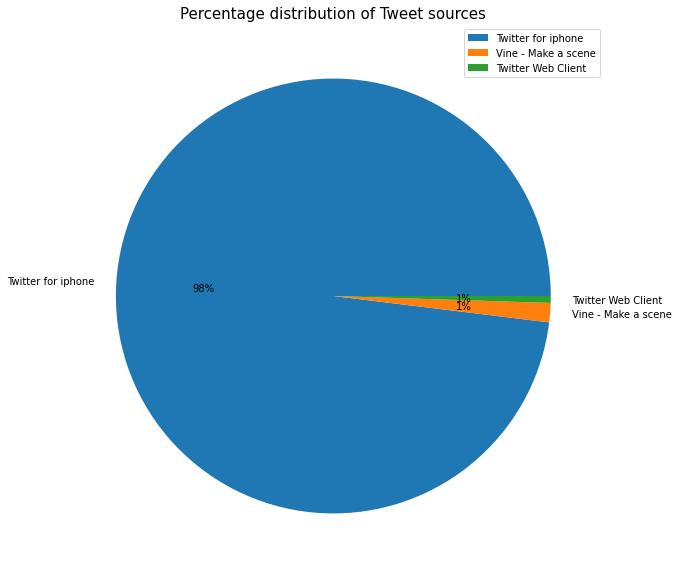

In [69]:
#plot distribution of sources on a pie chart
df_archive_master.source.value_counts().plot(kind= 'pie',autopct= '%.0f%%', figsize= (10,10), labels= ['Twitter for iphone',
                                                                                                    'Vine - Make a scene','Twitter Web Client','TweetDeck'])
plt.ylabel("")
plt.legend()
plt.title('Percentage distribution of Tweet sources', fontsize= 15)

### **Most popular tweet (Likes and retweets)**

In [70]:
#Get maximum retweet count
df_archive_master.retweet_count.max()

70474

In [71]:
#Get observation with highest retweet count
max_retweet = df_archive_master[df_archive_master.retweet_count == 70474]
max_retweet

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_one,prediction_one_confidence,prediction_one_is_dog
762,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,70474,144484,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True


In [72]:
#check highest favorite count
df_archive_master.favorite_count.max()

144484

**No suprise the tweet with the highest retweets also happens to be the most liked** 

### Popular dog breed predictions

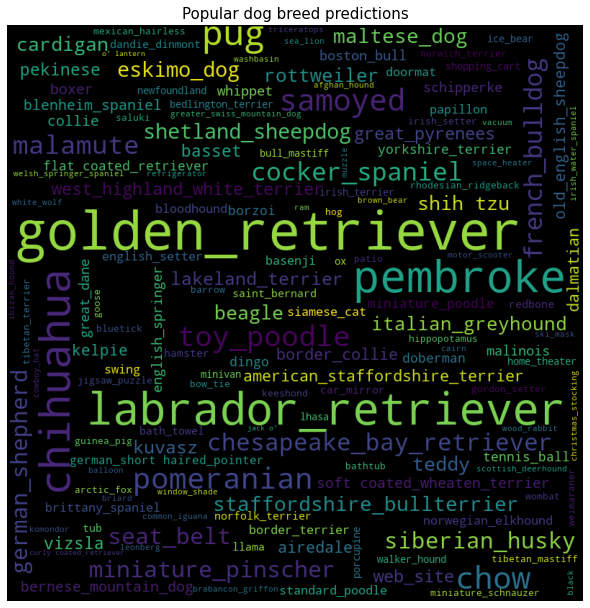

In [73]:
# set column to be visualized
pred = df_archive_master.prediction_one
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the column
for val in pred:
     
    # ensure each val is string and split 
    val = str(val)
    val = val.split()
     
    comment_words += " ".join(val)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Popular dog breed predictions', fontsize= 15)
 
plt.show()

The visual above suggests “Golden_retriever”, “Labrador_retriever”, ”Pembroke” and “Chihuahua” are the most popular dog breeds

In [74]:
#Get highest rating 
df_archive_master.rating_numerator.max()

1776

In [75]:
#Get observation with highest rating
highest_rating = df_archive_master[df_archive_master.rating_numerator == 1776]
highest_rating

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_one,prediction_one_confidence,prediction_one_is_dog
715,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,2272,4772,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False


### Average retweet and average likes per dog breeds

In [76]:
#exclude combined dog breed 
breed = df_archive_master.query('stage in ["doggo","floofer","puppo","pupper"]')

In [77]:
#Get average retweet by dog breed
avg_retweet = breed.groupby('stage')['retweet_count'].mean()
avg_retweet

stage
doggo      5954.080645
floofer    3966.142857
pupper     1918.398010
puppo      5310.272727
Name: retweet_count, dtype: float64

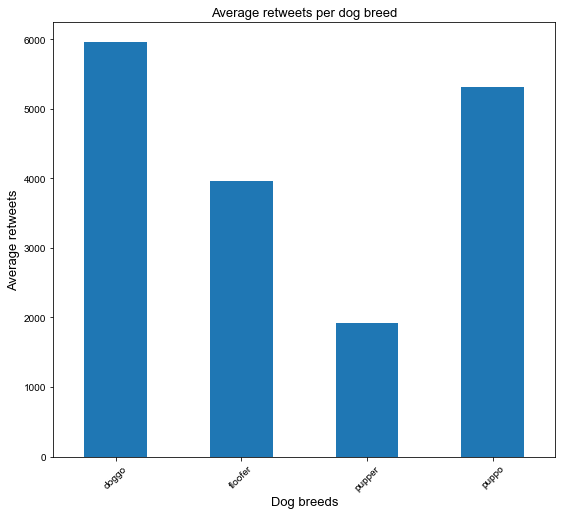

In [78]:
#plot average retweet
avg_retweet.plot(kind="bar", figsize=(9,8))
plt.title('Average retweets per dog breed', fontsize= 13)
plt.ylabel('Average retweets', fontsize= 13)
plt.xlabel('Dog breeds', fontsize= 13)
plt.xticks(rotation=45)
sns.set_style('darkgrid')
plt.show()

Doggo's get the highest retweets with Puppo's closely in second place.

In [79]:
#Get average likes by dog breed
avg_likes = breed.groupby('stage')['favorite_count'].mean()
avg_likes

stage
doggo      17557.758065
floofer    11193.714286
pupper      6235.761194
puppo      19530.045455
Name: favorite_count, dtype: float64

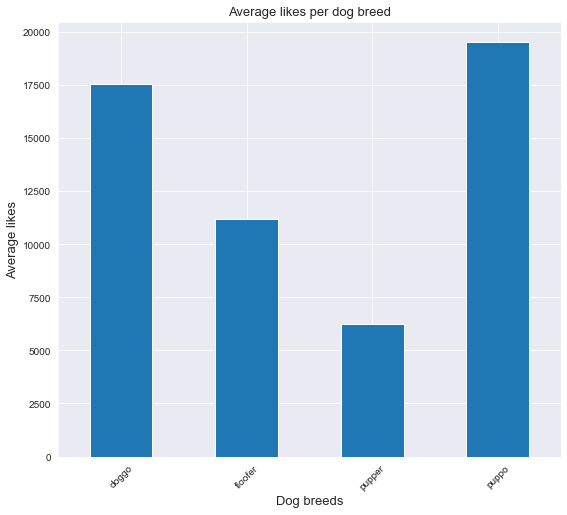

In [95]:
#plot average likes
order = avg_likes.index
avg_likes.plot(kind = 'bar', figsize=(9,8))
plt.title('Average likes per dog breed', fontsize= 13)
plt.ylabel('Average likes', fontsize= 13)
plt.xlabel('Dog breeds', fontsize= 13)
plt.xticks(rotation=45)
sns.set_style('darkgrid')
plt.show()

On the other hand Puppo's get the highest likes on each tweet while Doggo's are second favorites.

In [81]:
df_archive_master['Year'] = df_archive_master['timestamp'].dt.year

In [82]:
df_archive_master.Year.unique()

array([2017, 2016, 2015], dtype=int64)

In [83]:
df_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_one,prediction_one_confidence,prediction_one_is_dog,Year
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6981,33737,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5284,29265,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3468,22000,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7203,36844,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7727,35231,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017


In [84]:
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   1963 non-null   int64              
 1   timestamp                  1963 non-null   datetime64[ns, UTC]
 2   source                     1963 non-null   object             
 3   text                       1963 non-null   object             
 4   expanded_urls              1963 non-null   object             
 5   rating_numerator           1963 non-null   int64              
 6   rating_denominator         1963 non-null   int64              
 7   names                      1362 non-null   object             
 8   stage                      302 non-null    object             
 9   retweet_count              1963 non-null   int64              
 10  favorite_count             1963 non-null   int64              
 11  jpg_

In [85]:
df_archive_master.retweet_count.sum()

4418054

In [86]:
df_archive_master.favorite_count.sum()

15190027

In [100]:
df_archive_master.prediction_one.value_counts().to_frame().head(10)

,prediction_one
golden_retriever,137
labrador_retriever,91
pembroke,88
chihuahua,78
pug,54
chow,41
samoyed,39
pomeranian,38
toy_poodle,36
malamute,29
